In [1]:
import os, sys
import numpy as np
import h5py
import json
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

parent = os.path.abspath(os.getcwd() + "/../")
sys.path.append(parent)

from analyzer.model.utils.extracting import compute_region_size

gtfns_mouse = 'datasets/mouseA/mito_export_allgroups'

cell_type_vector_all = ['myelinated axon', 'spiny dendrite', 'unsure dendrite', 'smooth dendrite', 'e_axon', 
                        'i_axon', 'presynaptic bouton(ex)', 'presynaptic bouton(in)', 'dendritic spine (ex)', 
                        'cellbodies', 'glia', 'unsure axon', 'unsure neurite']

cell_type_vector_main = ['cellbodies', 'glia', 'unsure', 'axons', 'dendrites']

In [34]:
#sizef_mouse = compute_region_size(dprc='iter', fns=gtfns_mouse)

with h5py.File(parent + '/features/mouseA/sizef.h5', "r") as h5f:
    labels = np.array(h5f['id'], dtype=np.uint16)
        
    sizef_mouse = np.array(h5f['size'])
    print('Loaded {} features to cache.'.format('size'))
    
with h5py.File(parent + '/features/mouseA/circf.h5', "r") as h5f:
    cirf_mouse = np.array(h5f['circ'])
    
with h5py.File(parent + '/features/mouseA/surface_to_volumef.h5', "r") as h5f:
    sv_mouse = np.array(h5f['surface_to_volume'])
    
with h5py.File(parent + '/features/mouseA/slenf.h5', "r") as h5f:
    labels = np.array(h5f['id'], dtype=np.uint16)
        
    slenf_mouse = np.array(h5f['slen'])
    print('Loaded {} features to cache.'.format('skeleton length'))

#with open(os.path.join(parent, 'features/mouseA/gt_vector_allgroups.json'), 'r') as f:
with open(os.path.join(parent, 'features/mouseA/gt_vector.json'), 'r') as f:
    gt_vector = np.array(json.loads(f.read()))
    #print(np.unique(gt_vector))
    for idx, value in enumerate(list(np.unique(gt_vector))):
        gt_vector[gt_vector == value] = idx

        
all_cell_labels = list()
for i in range(gt_vector.shape[0]):
    label = gt_vector[i]
    idx = np.argwhere(np.unique(gt_vector) == gt_vector[i])[0][0]
    all_cell_labels.append(cell_type_vector_all[idx])
    
main_cell_labels = list()

for i in range(gt_vector.shape[0]):
    label = gt_vector[i]
    idx = np.argwhere(np.unique(gt_vector) == gt_vector[i])[0][0]
    main_cell_labels.append(cell_type_vector_main[idx-1])


Loaded size features to cache.
Loaded skeleton length features to cache.


In [35]:
vol_data = np.swapaxes(np.stack((sizef_mouse, gt_vector)), 0, 1)
dataset = pd.DataFrame({'label': labels, 'gt_label': gt_vector, 'vol': sizef_mouse, 'skeleton_len': slenf_mouse, 'cell type': main_cell_labels, 'circ_f': cirf_mouse, 's2v': sv_mouse})

print(dataset)

       label  gt_label     vol  skeleton_len  cell type    circ_f       s2v
0          1         0  164709    535.056274  dendrites  0.566431  0.071780
1          2         0  116462    656.349348  dendrites  0.641276  0.093942
2          3         0    4833     29.257025  dendrites  0.860658  0.173209
3          4         0    6095     12.666822  dendrites  0.789618  0.113986
4          5         0   23904     66.130513  dendrites  0.834063  0.107778
...      ...       ...     ...           ...        ...       ...       ...
23269  22081         0    1614      1.732051  dendrites  0.782410  0.141066
23270  22085         4    2662     18.055470      axons  0.567077  0.125859
23271  23209         0    3170      3.316625  dendrites  0.686371  0.107010
23272  23210         0    2223      1.732051  dendrites  0.589140  0.137692
23273  23212         0    1981      2.449490  dendrites  0.648306  0.139399

[23274 rows x 7 columns]


<AxesSubplot:xlabel='cell type', ylabel='count'>

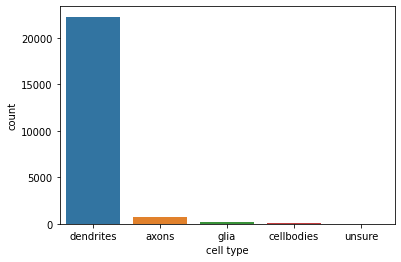

In [10]:
sb.countplot(x=dataset['cell type'])

[(0.0, 2.0)]

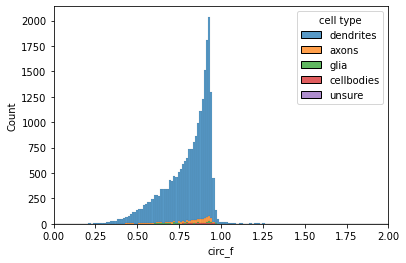

In [47]:
hp = sb.histplot(data=dataset, x="circ_f", hue="cell type", multiple="stack")
hp.set(xlim=(0, 2))

[(0.0, 2.0)]

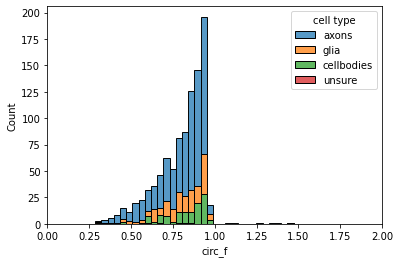

In [55]:
hp = sb.histplot(data=dataset.loc[dataset['cell type'] != "dendrites"], x="circ_f", hue="cell type", multiple="stack")
hp.set(xlim=(0, 2))

[(0.0, 0.4)]

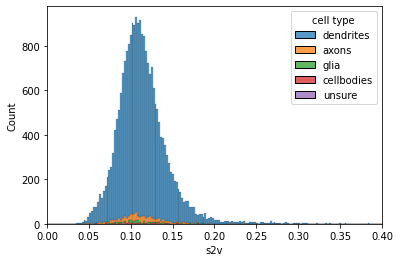

In [60]:
hp = sb.histplot(data=dataset, x="s2v", hue="cell type", multiple="stack")
hp.set(xlim=(0, 0.4))

[(0.0, 0.4)]

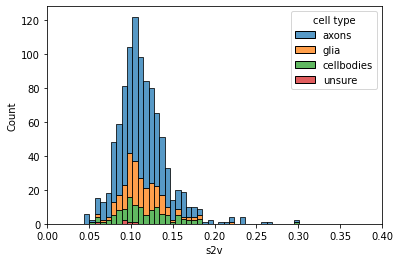

In [59]:
hp = sb.histplot(data=dataset.loc[dataset['cell type'] != "dendrites"], x="s2v", hue="cell type", multiple="stack")
hp.set(xlim=(0, 0.4))

<AxesSubplot:>

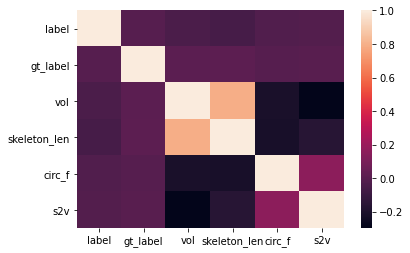

In [62]:
corr = dataset.corr()
sb.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="rocket")

<Figure size 3600x2880 with 0 Axes>

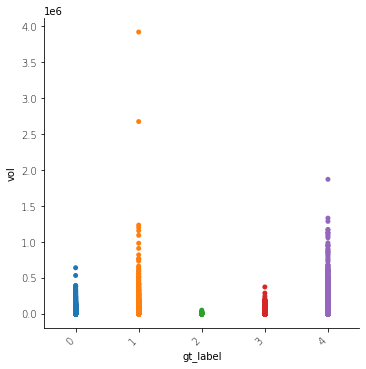

In [21]:
plt.figure(figsize=(50,40))

tmp = sb.catplot(x="gt_label", y="vol", jitter=False, data=dataset)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10  
)
plt.yticks(
    fontweight='light',
    fontsize=10
)
#sb.catplot(x="gt_label", y="vol", kind="box", data=dataset)
tmp.savefig("cat_plot.svg")


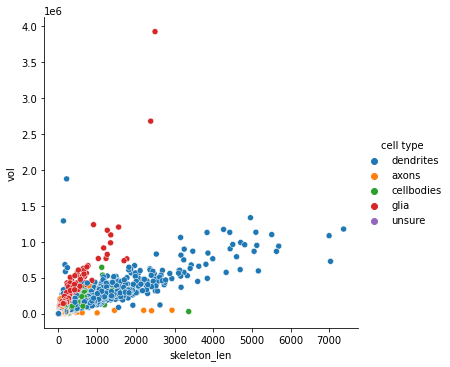

In [20]:
sb.relplot(x="skeleton_len", y="vol", hue="cell type", data=dataset)

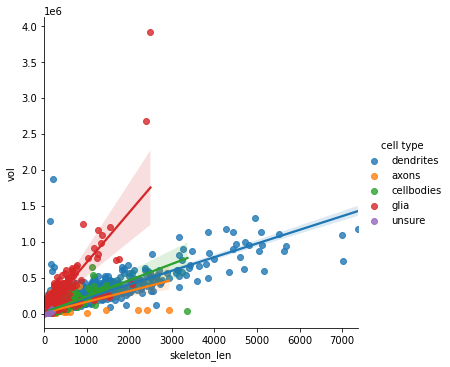

In [25]:
#sb.regplot(x="skeleton_len", y="vol", color="cell type", data=dataset)
g = sb.lmplot(
    data=dataset,
    x="skeleton_len", y="vol", hue="cell type",
    #height=5
)